## ADTA 5130 - Lab 2
### Exploratory Data Analysis

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Read .csv file
df = pd.read_csv('nycflights.csv')

In [2]:
#Return column names
df.columns

Index(['year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time',
       'arr_delay', 'carrier', 'tailnum', 'flight', 'origin', 'dest',
       'air_time', 'distance', 'hour', 'minute'],
      dtype='object')

In [4]:
#View distance metrics
df['distance'].describe()

,distance
count,32735.000000
mean,1046.244051
std,733.681907
min,94.000000
25%,502.000000
50%,888.000000
75%,1391.000000
max,4983.000000


In [5]:
#Median
df['distance'].median()

888.0

In [6]:
#Variance
df['distance'].var()

538289.1411767233

In [7]:
#Standard Deviation
df['distance'].std()

733.6819073527187

In [8]:
#Inter-Quartile Range
q75, q25 = np.percentile(df['distance'], [75,25])
iqr = q75 - q25
print(iqr)

889.0


<Axes: >

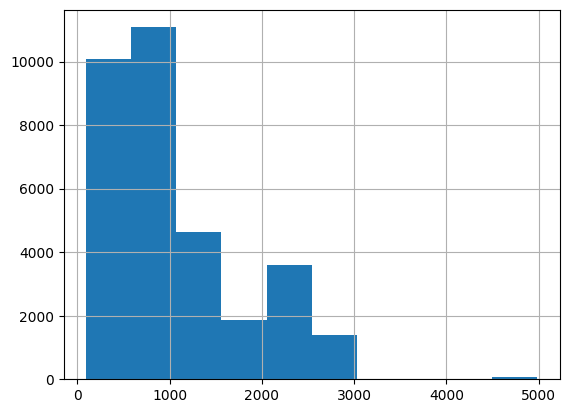

In [9]:
#Histogram of distance
df['distance'].hist()

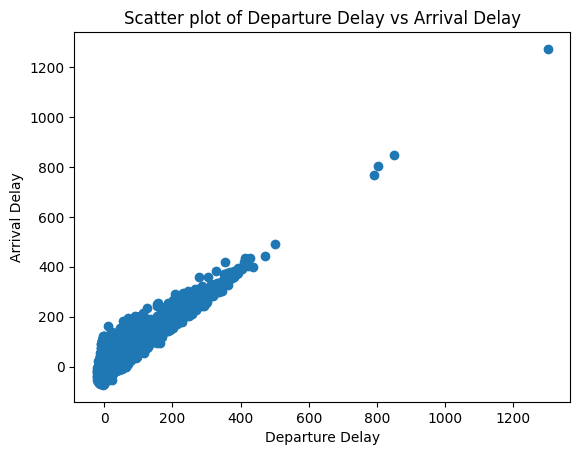

In [11]:
plt.title("Scatter plot of Departure Delay vs Arrival Delay")
plt.xlabel("Departure Delay")
plt.ylabel("Arrival Delay")
plt.scatter(df['dep_delay'],df['arr_delay'])

In [12]:
#Number of Departure Delays
dep_delays_n = (df['dep_delay'] > 0).sum()
print(f"There are {dep_delays_n} flights with departure delays.")

There are 12799 flights with departure delays.


In [13]:
#Table of Delays
df['dep_delay_trans'] = np.where(df['dep_delay'] > 0, 'Delayed Departure', 'Not Delayed Departure')
df['arr_delay_trans'] = np.where(df['arr_delay'] > 0, 'Delayed Arrival', 'Not Delayed Arrival')
data_crosstab = pd.crosstab(df['arr_delay_trans'],
                            df['dep_delay_trans'],
                               margins = True)

In [14]:
print(data_crosstab)

dep_delay_trans      Delayed Departure  Not Delayed Departure    All
arr_delay_trans                                                     
Delayed Arrival                   9291                   4171  13462
Not Delayed Arrival               3508                  15765  19273
All                              12799                  19936  32735


In [15]:
#Display table as percentage
data_crosstab = pd.crosstab(df['arr_delay_trans'],
                            df['dep_delay_trans'],
                               margins = True, normalize = True)
print(data_crosstab)

dep_delay_trans      Delayed Departure  Not Delayed Departure       All
arr_delay_trans                                                        
Delayed Arrival               0.283825               0.127417  0.411242
Not Delayed Arrival           0.107164               0.481595  0.588758
All                           0.390988               0.609012  1.000000


In [16]:
#Average Distance Log10
df['distance_log10'] = np.log10(df['distance'])
df['distance_log10'].mean()

np.float64(2.9046098107512215)

<Axes: title={'center': 'Histogram of Minutes per Flight'}, xlabel='Minutes', ylabel='Number of Flights'>

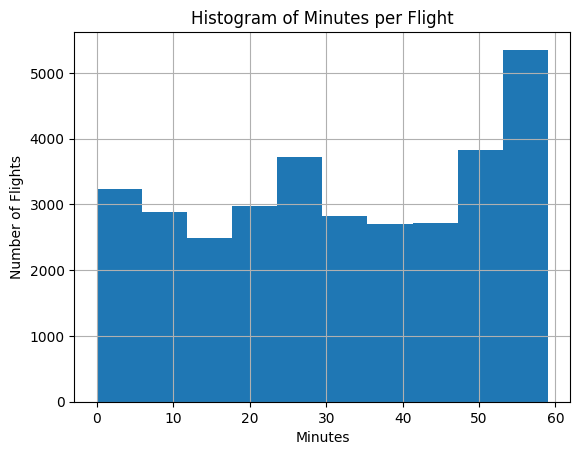

In [19]:
#Histogram of minutes
plt.xlabel("Minutes")
plt.ylabel("Number of Flights")
plt.title("Histogram of Minutes per Flight")
df['minute'].hist()